# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an **Italian restaurant** in **paris**, France.
Paris has in total 20 boroughs (called arrondissements in French) and 80 neighborhoods (4 neighborhoods for each borough).
Various factors need to be studied in order to decide on the location such as:

* Italian restaurants in vicinity
* Total restaurants in vicinity
* Paris Population
* Median household income for the neighborhoods
* Average rent in the area
* Area popularity
* Distance from Paris center

The analysis and recommendations for new Italian restaurant locations will focus on general neighborhoods with these establishments, not on specific addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the stakeholders.

## Data <a name="data"></a>

Following data sources will be needed to extract/generate the required information:
number of existing restaurants in the neighborhood (any type of restaurant)
* number of existing restaurants in the neighborhood, type and location will be obtained using **Foursquare API**
* In order to get latitude and longitude values of Paris center we use geopy library
* Data set of paris quartier obtained from: https://opendata.paris.fr/explore/dataset/quartier_paris/information/
* Data set of paris arrondissements obtained from: https://www.data.gouv.fr/en/datasets/arrondissements-1/
* The relevant data of Paris Population and Median household income for each arrondissements obtained from: https://frenchmoments.eu/arrondissements-of-paris/
* Data set of Average rent in each arrondissements obtained from: https://www.statista.com/statistics/769062/rent-the-metre-square-apartments-by-districts-paris-la-france/
* The rank that was given for each arrondissements based on the data from: https://theearfultower.com/2018/06/06/the-top-paris-arrondissements-for-tourists-ranked-from-worst-to-best/

Before we start with the main lab content, let's download all the dependencies that we will need.

In [259]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Download and Explore city of Paris geographical coordinates dataset

Paris has a total of 20 boroughs (arrondissements in french) and 80 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 20 boroughs and the neighborhoods that exist in each borough as well as the latitude and logitude coordinates of each neighborhood.



#### Get the data set of paris quartier.

In [260]:
with open('quartier_paris.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [261]:
newyork_data

[{'datasetid': 'quartier_paris',
  'recordid': 'a69f1a28df15be495f47c1d57ee2a47c232623ce',
  'fields': {'n_sq_qu': 750000027,
   'perimetre': 3887.70315653,
   'geom_x_y': [48.8503592615, 2.31103093627],
   'c_qu': 27,
   'surface': 807870.76658157,
   'l_qu': 'Ecole-Militaire',
   'geom': {'type': 'Polygon',
    'coordinates': [[[2.320083673707669, 48.84818013038714],
      [2.319355218603575, 48.84784504323267],
      [2.319079057823354, 48.84773439185731],
      [2.318043221601835, 48.84733814741461],
      [2.318043100931278, 48.84733810085932],
      [2.316571525922003, 48.84682460831802],
      [2.3160975091794302, 48.8466630424579],
      [2.313729873586329, 48.84593328746268],
      [2.313641280957853, 48.845990046203234],
      [2.31209102721761, 48.846983212751105],
      [2.311767709159531, 48.84719033639172],
      [2.311625847644086, 48.847281216555366],
      [2.311486631195697, 48.847368856075924],
      [2.311260835819493, 48.847510996658556],
      [2.311155375922277, 

####  Transform the data into a *pandas* dataframe.

In [262]:
quartier_paris=pd.json_normalize(newyork_data)
quartier_paris

datasetid                                  recordid  \
0   quartier_paris  a69f1a28df15be495f47c1d57ee2a47c232623ce   
1   quartier_paris  c81cbe6fafa11351647293ad0bb8c42366fe364a   
2   quartier_paris  a3513423d69a238ac6d5b30bf18339da3846b27f   
3   quartier_paris  30eac957573eeeec98ed8add4d8657517c0ea59f   
4   quartier_paris  57fbc66fe26432ee1854451c75aea0d4565a05d3   
5   quartier_paris  8acdf315bb9ef8855fb6eec66d58c6f0fa2cfe95   
6   quartier_paris  b1756430581b918cffc63578c5ac60b176d093af   
7   quartier_paris  f8a71ea1cfedf4071018dc51ca657e7ed82dd795   
8   quartier_paris  a4d86debf75c5b77e43c62126c4b03a0ec771750   
9   quartier_paris  8e4e354c0f5d1975eeb266b96bba07be71bb8e37   
10  quartier_paris  4c78078d7588fe340206c456800dee513814fd5f   
11  quartier_paris  f26d1f43a3e1a5b0e39191a5b793e0d44043870a   
12  quartier_paris  07d0efa6ba9c4030e2d379ad164ef90bae1d8933   
13  quartier_paris  e9b88b6659259cbd409044bd48ad04b4548f0483   
14  quartier_paris  3e9672d70da25bf1eb5d747e62dd37d1f8c7a621   
15  quartier_paris  ce700f81b59b2ba16ef94142d804ebd4ba7de2c1   
16  quartier_paris  e43bbf3675b90df6cafa05a01541fa368d007ac7   
17  quartier_paris  54f229d9b4bb8426ad13c853e443c4728c34f375   
18  quartier_paris  4bd0d51d857a08136619d5dbce5d119dc4d4aeb1   
19  quartier_paris  d088d5e5042d724ac17b61f5b9b36264481caca7   
20  quartier_paris  53462361713bf4f022723cf471d8433ea0119e1d   
21  quartier_paris  ec2524a57da144531acf6cf61c39bb912efbf79e   
22  quartier_paris  35866ee0ac1dcff531495ead9d6ba90afea2a600   
23  quartier_paris  8e2ef646db62563e4aeeff17725cc9b3a85f3242   
24  quartier_paris  82f5126938465df15fbb05f48b251fc85ffeddf0   
25  quartier_paris  1ad9775fdef17ea2aae1828196b87772a35638bd   
26  quartier_paris  8ac898f7254fc13f3a31eb352c9d5105d8523053   
27  quartier_paris  6691cf329c83a99eeb6d039dfc5419efe625c529   
28  quartier_paris  e0178ba4b811a3adcecdd438c09224743e25f24f   
29  quartier_paris  d7fc2b0fb947374330fa5fb1b03d1d22c6e88aae   
30  quartier_paris  83444fc12fcef6c694f4e99dd7b201044e6ebc12   
31  quartier_paris  4199a456fd168f403e57805c5b885a1ab111660d   
32  quartier_paris  cd6ec23048274d45a2bbfe7fe72e158c4eda782f   
33  quartier_paris  7110c3c7dff50ebd35dc41463789b78343ad0469   
34  quartier_paris  10c5545818e09beacaff49049e14e571ac404d5c   
35  quartier_paris  58fa23024e085bacc731e75a792f92196f26e5a6   
36  quartier_paris  e08badb46e9c0c5f539a4179e94b4148553aa84b   
37  quartier_paris  1532da92ce5889ed7537efbb0115af39623ef544   
38  quartier_paris  3b5ae5590383eda40e7492f026020bfd4fa035b3   
39  quartier_paris  d1bcc8fe202a064d831bad32be5f2241b0bf223f   
40  quartier_paris  a33e68b23cca67896979b453d650b5d29e7bf25f   
41  quartier_paris  c09d3c216c5ec8dfbe70f9696ebf5b8831040339   
42  quartier_paris  7f4e2ddb053283c33ba193f6e0b80a62a91801b4   
43  quartier_paris  68ff5dadc2162b0e039f73715397b6011824ae86   
44  quartier_paris  1f6a77f949c237ebb35f5cee43d1100d13741f0c   
45  quartier_paris  4a9ed8eda619a1f115a0175b11857a74a3326029   
46  quartier_paris  3e1d684f181c5626a224c045b71033015774651e   
47  quartier_paris  0a503738520593c54dae9cd79775825bd5c5871c   
48  quartier_paris  c835ec01c1f85a1a785d693ce3313c2cf6376ae1   
49  quartier_paris  89f18b14af61df2834fd7087e5c0ca72c811cf79   
50  quartier_paris  6362826c56514eaec38f36bac27f8d3d15040fa2   
51  quartier_paris  a92a550ae4e786fe41359fc468d00dea14513fa4   
52  quartier_paris  b3fbef0d4570d5b3f9bd3236bbb97789201f3e89   
53  quartier_paris  30d77654d36fbf7cac04d38af51c5d34c6c11f06   
54  quartier_paris  78a6fa4b9eb30d23cc80003b7441db1cdfbb7cfa   
55  quartier_paris  285086059cf67fcdcb81be5a39102a962445174d   
56  quartier_paris  df087e446f78532f82a338012b143f7675b0a8d3   
57  quartier_paris  e47e1889ff0825c9669238f9c9a98743873d3d7f   
58  quartier_paris  2fa930183bf35f7053e640c8c8c4bdacedae6545   
59  quartier_paris  2072a331129fb1180f303b30ec222215a5d8f993   
60  quartier_paris  4c8a593e9c20a112fadc089651ba457e068261b1   
61  quartier_paris  c922b85bd8b29317ac332

In [263]:
# Extract the Latitude and Longitude for each quartier and set the values in new columns
for i in range(len(quartier_paris)):
    quartier_paris.loc[i,'Latitude']=quartier_paris.loc[i,'geometry.coordinates'][1]
    quartier_paris.loc[i,'Longitude']=quartier_paris.loc[i,'geometry.coordinates'][0]
quartier_paris.drop('geometry.coordinates',1,inplace=True)

# convert the features to float type
quartier_paris['Latitude']=quartier_paris['Latitude'].astype(float)
quartier_paris['Longitude']=quartier_paris['Longitude'].astype(float)

quartier_paris

datasetid                                  recordid  \
0   quartier_paris  a69f1a28df15be495f47c1d57ee2a47c232623ce   
1   quartier_paris  c81cbe6fafa11351647293ad0bb8c42366fe364a   
2   quartier_paris  a3513423d69a238ac6d5b30bf18339da3846b27f   
3   quartier_paris  30eac957573eeeec98ed8add4d8657517c0ea59f   
4   quartier_paris  57fbc66fe26432ee1854451c75aea0d4565a05d3   
5   quartier_paris  8acdf315bb9ef8855fb6eec66d58c6f0fa2cfe95   
6   quartier_paris  b1756430581b918cffc63578c5ac60b176d093af   
7   quartier_paris  f8a71ea1cfedf4071018dc51ca657e7ed82dd795   
8   quartier_paris  a4d86debf75c5b77e43c62126c4b03a0ec771750   
9   quartier_paris  8e4e354c0f5d1975eeb266b96bba07be71bb8e37   
10  quartier_paris  4c78078d7588fe340206c456800dee513814fd5f   
11  quartier_paris  f26d1f43a3e1a5b0e39191a5b793e0d44043870a   
12  quartier_paris  07d0efa6ba9c4030e2d379ad164ef90bae1d8933   
13  quartier_paris  e9b88b6659259cbd409044bd48ad04b4548f0483   
14  quartier_paris  3e9672d70da25bf1eb5d747e62dd37d1f8c7a621   
15  quartier_paris  ce700f81b59b2ba16ef94142d804ebd4ba7de2c1   
16  quartier_paris  e43bbf3675b90df6cafa05a01541fa368d007ac7   
17  quartier_paris  54f229d9b4bb8426ad13c853e443c4728c34f375   
18  quartier_paris  4bd0d51d857a08136619d5dbce5d119dc4d4aeb1   
19  quartier_paris  d088d5e5042d724ac17b61f5b9b36264481caca7   
20  quartier_paris  53462361713bf4f022723cf471d8433ea0119e1d   
21  quartier_paris  ec2524a57da144531acf6cf61c39bb912efbf79e   
22  quartier_paris  35866ee0ac1dcff531495ead9d6ba90afea2a600   
23  quartier_paris  8e2ef646db62563e4aeeff17725cc9b3a85f3242   
24  quartier_paris  82f5126938465df15fbb05f48b251fc85ffeddf0   
25  quartier_paris  1ad9775fdef17ea2aae1828196b87772a35638bd   
26  quartier_paris  8ac898f7254fc13f3a31eb352c9d5105d8523053   
27  quartier_paris  6691cf329c83a99eeb6d039dfc5419efe625c529   
28  quartier_paris  e0178ba4b811a3adcecdd438c09224743e25f24f   
29  quartier_paris  d7fc2b0fb947374330fa5fb1b03d1d22c6e88aae   
30  quartier_paris  83444fc12fcef6c694f4e99dd7b201044e6ebc12   
31  quartier_paris  4199a456fd168f403e57805c5b885a1ab111660d   
32  quartier_paris  cd6ec23048274d45a2bbfe7fe72e158c4eda782f   
33  quartier_paris  7110c3c7dff50ebd35dc41463789b78343ad0469   
34  quartier_paris  10c5545818e09beacaff49049e14e571ac404d5c   
35  quartier_paris  58fa23024e085bacc731e75a792f92196f26e5a6   
36  quartier_paris  e08badb46e9c0c5f539a4179e94b4148553aa84b   
37  quartier_paris  1532da92ce5889ed7537efbb0115af39623ef544   
38  quartier_paris  3b5ae5590383eda40e7492f026020bfd4fa035b3   
39  quartier_paris  d1bcc8fe202a064d831bad32be5f2241b0bf223f   
40  quartier_paris  a33e68b23cca67896979b453d650b5d29e7bf25f   
41  quartier_paris  c09d3c216c5ec8dfbe70f9696ebf5b8831040339   
42  quartier_paris  7f4e2ddb053283c33ba193f6e0b80a62a91801b4   
43  quartier_paris  68ff5dadc2162b0e039f73715397b6011824ae86   
44  quartier_paris  1f6a77f949c237ebb35f5cee43d1100d13741f0c   
45  quartier_paris  4a9ed8eda619a1f115a0175b11857a74a3326029   
46  quartier_paris  3e1d684f181c5626a224c045b71033015774651e   
47  quartier_paris  0a503738520593c54dae9cd79775825bd5c5871c   
48  quartier_paris  c835ec01c1f85a1a785d693ce3313c2cf6376ae1   
49  quartier_paris  89f18b14af61df2834fd7087e5c0ca72c811cf79   
50  quartier_paris  6362826c56514eaec38f36bac27f8d3d15040fa2   
51  quartier_paris  a92a550ae4e786fe41359fc468d00dea14513fa4   
52  quartier_paris  b3fbef0d4570d5b3f9bd3236bbb97789201f3e89   
53  quartier_paris  30d77654d36fbf7cac04d38af51c5d34c6c11f06   
54  quartier_paris  78a6fa4b9eb30d23cc80003b7441db1cdfbb7cfa   
55  quartier_paris  285086059cf67fcdcb81be5a39102a962445174d   
56  quartier_paris  df087e446f78532f82a338012b143f7675b0a8d3   
57  quartier_paris  e47e1889ff0825c9669238f9c9a98743873d3d7f   
58  quartier_paris  2fa930183bf35f7053e640c8c8c4bdacedae6545   
59  quartier_paris  2072a331129fb1180f303b30ec222215a5d8f993   
60  quartier_paris  4c8a593e9c20a112fadc089651ba457e068261b1   
61  quartier_paris  c922b85bd8b29317ac332

In [264]:
# filter columns
quartier_paris=quartier_paris[['fields.c_qu','fields.l_qu','fields.c_ar','Latitude','Longitude']]

# new column names
new_column=['quartier_number','quartier_name','arrondissement_number','Latitude','Longitude']
quartier_paris.columns=new_column

quartier_paris

quartier_number              quartier_name  arrondissement_number  \
0                27            Ecole-Militaire                      7   
1                59                   Grenelle                     15   
2                61                    Auteuil                     16   
3                12               Sainte-Avoie                      3   
4                40        Hôpital-Saint-Louis                     10   
5                77                 Belleville                     20   
6                65                     Ternes                     17   
7                14              Saint-Gervais                      4   
8                25       Saint-Thomas-d'Aquin                      7   
9                38          Porte-Saint-Denis                     10   
10                1  Saint-Germain-l'Auxerrois                      1   
11               73                   Villette                     19   
12               20                   Sorbonne                      5   
13               33              Saint-Georges                      9   
14               34           Chaussée-d'Antin                      9   
15                3               Palais-Royal                      1   
16               21                    Monnaie                      6   
17               22                      Odéon                      6   
18               29             Champs-Elysées                      8   
19               51             Maison-Blanche                     13   
20               52                Croulebarbe                     13   
21               13                Saint-Merri                      4   
22               16                 Notre-Dame                      4   
23               28               Gros-Caillou                      7   
24               26                  Invalides                      7   
25               35        Faubourg-Montmartre                      9   
26                5                    Gaillon                      2   
27               75                   Amérique                     19   
28               41            Folie-Méricourt                     11   
29               49                Salpêtrière                     13   
30                4              Place-Vendôme                      1   
31               76                     Combat                     19   
32               80                   Charonne                     20   
33               60                      Javel                     15   
34               15                    Arsenal                      4   
35               18         Jardin-des-Plantes                      5   
36               39         Porte-Saint-Martin                     10   
37               43                   Roquette                     11   
38               46                     Picpus                     12   
39               56                  Plaisance                     14   
40               19               Val-de-Grâce                      5   
41               58                     Necker                     15   
42               79              Père-Lachaise                     20   
43               72                La Chapelle                     18   
44               23      Notre-Dame-des-Champs                      6   
45               55            Petit-Montrouge                     14   
46               74            Pont-de-Flandre                     19   
47               62                     Muette                     16   
48               64                   Chaillot                     16   
49               68                  Epinettes                     17   
50               32                     Europe                      8   
51               44          Sainte-Marguerite                     11   
52               54         Parc-de-Montsouris                     14   
53               57              Saint-Lambert                

#### Get the data set of paris arrondissement.

In [265]:
Borough_paris=pd.read_csv('arrondissements.csv',sep=';')
Borough_paris.head()

N_SQ_AR  C_AR  C_ARINSEE        L_AR              L_AROFF    N_SQ_CO  \
0  750000002     2      75102   2ème Ardt               Bourse  750001537   
1  750000017    17      75117  17ème Ardt  Batignolles-Monceau  750001537   
2  750000007     7      75107   7ème Ardt       Palais-Bourbon  750001537   
3  750000003     3      75103   3ème Ardt               Temple  750001537   
4  750000001     1      75101    1er Ardt               Louvre  750001537   

        SURFACE     PERIMETRE                 Geometry X Y  \
0  9.911537e+05   4554.104360  48.8682792225,2.34280254689   
1  5.668835e+06  10775.579516   48.887326522,2.30677699057   
2  4.090057e+06   8099.424883  48.8561744288,2.31218769148   
3  1.170883e+06   4519.263648     48.86287238,2.3600009859   
4  1.824613e+06   6054.936862  48.8625627018,2.33644336205   

                                            Geometry  OBJECTID      LONGUEUR  
0  {"type": "Polygon", "coordinates": [[[2.351518...         2   4553.938764  
1  {"type": "Polygon", "coordinates": [[[2.295166...        17  10775.348915  
2  {"type": "Polygon", "coordinates": [[[2.320902...         7   8099.033151  
3  {"type": "Polygon", "coordinates": [[[2.363828...         3   4519.071982  
4  {"type": "Polygon", "coordinates": [[[2.328007...         1   6054.680862

In [266]:
# filter columns
Borough_paris=Borough_paris[['N_SQ_AR','C_AR','L_AROFF','Geometry X Y']]

# new column names 
new_column=['postal_codes','arrondissement_number','arrondissement_name','Geometry X Y']
Borough_paris.columns=new_column

# split the Geometry X Y feature
Borough_paris['Geometry X Y']=Borough_paris['Geometry X Y'].apply(lambda x: x.split(','))

Borough_paris

postal_codes  arrondissement_number  arrondissement_name  \
0      750000002                      2               Bourse   
1      750000017                     17  Batignolles-Monceau   
2      750000007                      7       Palais-Bourbon   
3      750000003                      3               Temple   
4      750000001                      1               Louvre   
5      750000010                     10             Entrepôt   
6      750000016                     16                Passy   
7      750000004                      4       Hôtel-de-Ville   
8      750000008                      8               Élysée   
9      750000018                     18    Buttes-Montmartre   
10     750000015                     15            Vaugirard   
11     750000009                      9                Opéra   
12     750000019                     19      Buttes-Chaumont   
13     750000011                     11           Popincourt   
14     750000013                     13             Gobelins   
15     750000014                     14         Observatoire   
16     750000020                     20         Ménilmontant   
17     750000005                      5             Panthéon   
18     750000006                      6           Luxembourg   
19     750000012                     12              Reuilly   

                      Geometry X Y  
0   [48.8682792225, 2.34280254689]  
1    [48.887326522, 2.30677699057]  
2   [48.8561744288, 2.31218769148]  
3      [48.86287238, 2.3600009859]  
4   [48.8625627018, 2.33644336205]  
5   [48.8761300365, 2.36072848785]  
6   [48.8603921054, 2.26197078836]  
7   [48.8543414263, 2.35762962032]  
8    [48.8727208374, 2.3125540224]  
9    [48.892569268, 2.34816051956]  
10  [48.8400853759, 2.29282582242]  
11  [48.8771635173, 2.33745754348]  
12  [48.8870759966, 2.38482096015]  
13   [48.8590592213, 2.3800583082]  
14  [48.8283880317, 2.36227244042]  
15   [48.8292445005, 2.3265420442]  
16  [48.8634605789, 2.40118812928]  
17  [48.8444431505, 2.35071460958]  
18  [48.8491303586, 2.33289799905]  
19  [48.8349743815, 2.42132490078]

In [267]:
# Extract the Latitude and Longitude for each quartier and set the values in new columns
for i in range(len(Borough_paris)):
    Borough_paris.loc[i,'Latitude']=Borough_paris.loc[i,'Geometry X Y'][0]
    Borough_paris.loc[i,'Longitude']=Borough_paris.loc[i,'Geometry X Y'][1]
    
# drop 'Geometry X Y' column
Borough_paris.drop('Geometry X Y',1,inplace=True)

# convert the features to float type
Borough_paris['Latitude']=Borough_paris['Latitude'].astype(float)
Borough_paris['Longitude']=Borough_paris['Longitude'].astype(float)

Borough_paris

postal_codes  arrondissement_number  arrondissement_name   Latitude  \
0      750000002                      2               Bourse  48.868279   
1      750000017                     17  Batignolles-Monceau  48.887327   
2      750000007                      7       Palais-Bourbon  48.856174   
3      750000003                      3               Temple  48.862872   
4      750000001                      1               Louvre  48.862563   
5      750000010                     10             Entrepôt  48.876130   
6      750000016                     16                Passy  48.860392   
7      750000004                      4       Hôtel-de-Ville  48.854341   
8      750000008                      8               Élysée  48.872721   
9      750000018                     18    Buttes-Montmartre  48.892569   
10     750000015                     15            Vaugirard  48.840085   
11     750000009                      9                Opéra  48.877164   
12     750000019                     19      Buttes-Chaumont  48.887076   
13     750000011                     11           Popincourt  48.859059   
14     750000013                     13             Gobelins  48.828388   
15     750000014                     14         Observatoire  48.829245   
16     750000020                     20         Ménilmontant  48.863461   
17     750000005                      5             Panthéon  48.844443   
18     750000006                      6           Luxembourg  48.849130   
19     750000012                     12              Reuilly  48.834974   

    Longitude  
0    2.342803  
1    2.306777  
2    2.312188  
3    2.360001  
4    2.336443  
5    2.360728  
6    2.261971  
7    2.357630  
8    2.312554  
9    2.348161  
10   2.292826  
11   2.337458  
12   2.384821  
13   2.380058  
14   2.362272  
15   2.326542  
16   2.401188  
17   2.350715  
18   2.332898  
19   2.421325

#### Use geopy library to get the latitude and longitude values of Paris City.

In [268]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
paris_center=[latitude,longitude]
print('The geograpical coordinate of Paris City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris City are 48.8566969, 2.3514616.


#### Create a map of Paris with arrondissement superimposed on top and the borders of Paris arrondissement.

In [269]:
def boroughs_style(feature):
    return { 'color': 'blue', 'fill': False }

In [270]:
map_paris_arr=folium.Map(location=paris_center,zoom_start=12)

for lat,lng, label in zip(Borough_paris.Latitude,Borough_paris.Longitude,Borough_paris.arrondissement_name):
    folium.features.CircleMarker([lat,lng],radius=5,color='blue',fill=True,fillcolor='#3186cc',fill_opacity=0.5,popup=folium.Popup(label, parse_html=True, max_width=100)).add_to(map_paris_arr)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(map_paris_arr)
map_paris_arr

#### Create a map of Paris with quartier superimposed on top.

In [271]:
map_paris_quartier=folium.Map(location=[latitude,longitude],zoom_start=11)
num_of_arr=20

rainbow=cm.rainbow(np.linspace(0,1,num_of_arr))
for index,row in quartier_paris.iterrows():
    col=colors.rgb2hex(rainbow[row.arrondissement_number-1])
    lat=row.Latitude
    lng=row.Longitude
    label='{}, arrondissement: {}.'.format(row.quartier_name,row.arrondissement_number)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker([lat,lng],radius=5,fill=True,color=col,fill_opacity=1,popup=label).add_to(map_paris_quartier)
    #folium.Circle([lat,lng], radius=750, fill=True, color='blue').add_to(map_paris_quartier)


#folium.Circle(paris_center, radius=750, fill=False, color='white').add_to(map_paris_quartier)
map_paris_quartier

## Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)


#### Define Foursquare Credentials and Version.

In [272]:
CLIENT_ID = '5D2DYO3GXYYO0JJMCAV5OY1BE0F1PKJGCWPIPQWLSOYZ0UF1' # your Foursquare ID
CLIENT_SECRET = 'CLN5DS13BACANKFCSACOWTM4LK3HMA0YFURSH4FF35IDJDGR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5D2DYO3GXYYO0JJMCAV5OY1BE0F1PKJGCWPIPQWLSOYZ0UF1
CLIENT_SECRET:CLN5DS13BACANKFCSACOWTM4LK3HMA0YFURSH4FF35IDJDGR


## Explore Neighborhoods in paris

Create a nearby venues function for all the neighborhoods in Paris.

In [322]:
# Category IDs corresponding to Italian restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):

food_category = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues

italian_restaurant_categories = ['4bf58dd8d48988d110941735','55a5a1ebe4b013909087cbb6','55a5a1ebe4b013909087cb7c',
                                 '55a5a1ebe4b013909087cba7','55a5a1ebe4b013909087cba1','55a5a1ebe4b013909087cba4',
                                 '55a5a1ebe4b013909087cb95','55a5a1ebe4b013909087cb89','55a5a1ebe4b013909087cb9b',
                                 '55a5a1ebe4b013909087cb98','55a5a1ebe4b013909087cbbf','55a5a1ebe4b013909087cb79',
                                 '55a5a1ebe4b013909087cbb0','55a5a1ebe4b013909087cbb3','55a5a1ebe4b013909087cb74',
                                 '55a5a1ebe4b013909087cbaa','55a5a1ebe4b013909087cb83','55a5a1ebe4b013909087cb8c',
                                 '55a5a1ebe4b013909087cb92','55a5a1ebe4b013909087cb8f','55a5a1ebe4b013909087cb86',
                                 '55a5a1ebe4b013909087cbb9','55a5a1ebe4b013909087cb7f','55a5a1ebe4b013909087cbbc',
                                 '55a5a1ebe4b013909087cb9e','55a5a1ebe4b013909087cbc2','55a5a1ebe4b013909087cbad']


def get_categories(categories):
    return[(cat['name'],cat['id']) for cat in categories]

def is_restaurant(categories,specific_filter=None):
    restaurant_words = ['restaurant', 'diner', 'taverna', 'steakhouse']
    restaurant = False
    specific = False
    category_name=categories[0][0].lower()
    category_id=categories[0][1]
    for r in restaurant_words:
        if r in category_name:
            restaurant=True 
    if 'fast food' in category_name:
        restaurant = False
    if not(specific_filter==None) and (category_id in specific_filter):
        restaurant=True
        specific=True
    return restaurant, specific
    
    
    

In [324]:
def get_restaurants(names, arr_number, latitudes, longitudes,radius=500):
    LIMIT = 250
    
    # using dictionaries to remove any duplicates resulting from area overlaps
    restaurants = {}

    for name, arr_num, lat, lng in zip(names,arr_number, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            food_category,
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list=[(name, arr_num, lat, lng, item['venue']['id'],
                item['venue']['name'],
                (item['venue']['location']['lat'],item['venue']['location']['lng']),
                 get_categories(item['venue']['categories'])) for item in results]
        #print(venues_list)
        for venues in venues_list:
            venue_id=venues[4]
            venue_name=venues[5]
            venue_latlon=venues[6]
            venue_categories=venues[7]
            is_res, is_italian=is_restaurant(venue_categories, specific_filter=italian_restaurant_categories)
            if is_res:
                restaurant=(name,arr_num,lat,lng,venue_id,venue_name,venue_latlon[0],venue_latlon[1],venue_categories,is_italian)
                restaurants[venue_id]=restaurant
                #print(restaurant)
    return restaurants

#### Now write the code to run the above function on each quartier and create the restaurants data.

In [325]:
restaurants=get_restaurants(quartier_paris.quartier_name, quartier_paris.arrondissement_number,
                            quartier_paris.Latitude, quartier_paris.Longitude, radius=750)

Convert the dictionary to data frame.

In [326]:
df_restaurants=pd.DataFrame(restaurants)
df_restaurants=df_restaurants.transpose()
columns=['quartier_name','arrondissement_number','quartier_lat','quartier_lng','venue_id','venue_name','venue_lat','venue_lng','venue_categories','is_italian']
df_restaurants.columns=columns
df_restaurants.reset_index(drop=True,inplace=True)
df_restaurants

quartier_name arrondissement_number quartier_lat  \
0                        Necker                    15      48.8427   
1               Ecole-Militaire                     7      48.8504   
2               Ecole-Militaire                     7      48.8504   
3               Ecole-Militaire                     7      48.8504   
4                        Necker                    15      48.8427   
5               Ecole-Militaire                     7      48.8504   
6               Ecole-Militaire                     7      48.8504   
7                     Invalides                     7      48.8585   
8         Notre-Dame-des-Champs                     6      48.8464   
9         Notre-Dame-des-Champs                     6      48.8464   
10                 Gros-Caillou                     7      48.8583   
11                    Invalides                     7      48.8585   
12                    Invalides                     7      48.8585   
13                    Invalides                     7      48.8585   
14                    Invalides                     7      48.8585   
15                 Gros-Caillou                     7      48.8583   
16        Notre-Dame-des-Champs                     6      48.8464   
17         Saint-Thomas-d'Aquin                     7      48.8553   
18                 Gros-Caillou                     7      48.8583   
19        Notre-Dame-des-Champs                     6      48.8464   
20                       Necker                    15      48.8427   
21        Notre-Dame-des-Champs                     6      48.8464   
22              Ecole-Militaire                     7      48.8504   
23                    Invalides                     7      48.8585   
24                       Necker                    15      48.8427   
25                 Gros-Caillou                     7      48.8583   
26                 Gros-Caillou                     7      48.8583   
27                    Invalides                     7      48.8585   
28              Ecole-Militaire                     7      48.8504   
29                 Gros-Caillou                     7      48.8583   
30                 Gros-Caillou                     7      48.8583   
31                       Necker                    15      48.8427   
32                    Invalides                     7      48.8585   
33                       Necker                    15      48.8427   
34         Saint-Thomas-d'Aquin                     7      48.8553   
35                     Grenelle                    15      48.8502   
36                 Gros-Caillou                     7      48.8583   
37        Notre-Dame-des-Champs                     6      48.8464   
38        Notre-Dame-des-Champs                     6      48.8464   
39                       Necker                    15      48.8427   
40                 Gros-Caillou                     7      48.8583   
41                 Gros-Caillou                     7      48.8583   
42              Ecole-Militaire                     7      48.8504   
43         Saint-Thomas-d'Aquin                     7      48.8553   
44              Ecole-Militaire                     7      48.8504   
45                       Necker                    15      48.8427   
46                       Necker                    15      48.8427   
47              Ecole-Militaire                     7      48.8504   
48              Ecole-Militaire                     7      48.8504   
49              Ecole-Militaire                     7      48.8504   
50                     Grenelle                    15      48.8502   
51                     Grenelle                    15      48.8502   
52                     Grenelle                    15      48.8502   
53                     Grenelle                    15      48.8502   
54                     Grenelle                    15      48.8502   
55                 Gros-Caillou                     7      48.8583   
56                     Grene

Create data frame for the italian restaurants only.

In [277]:
df_restaurants_italian=df_restaurants[df_restaurants.loc[:,'is_italian']==True].reset_index(drop=True)
df_restaurants_italian

quartier_name arrondissement_number quartier_lat quartier_lng  \
0     Notre-Dame-des-Champs                     6      48.8464      2.32736   
1                    Necker                    15      48.8427      2.31078   
2           Ecole-Militaire                     7      48.8504      2.31103   
3                 Invalides                     7      48.8585      2.31644   
4                    Necker                    15      48.8427      2.31078   
5                 Invalides                     7      48.8585      2.31644   
6                    Necker                    15      48.8427      2.31078   
7           Ecole-Militaire                     7      48.8504      2.31103   
8                  Grenelle                    15      48.8502      2.29185   
9                  Grenelle                    15      48.8502      2.29185   
10                 Grenelle                    15      48.8502      2.29185   
11                 Grenelle                    15      48.8502      2.29185   
12             Gros-Caillou                     7      48.8583      2.30154   
13                 Archives                     3      48.8592      2.36321   
14                   Halles                     1      48.8623       2.3449   
15          Arts-et-Métiers                     3      48.8665      2.35708   
16          Arts-et-Métiers                     3      48.8665      2.35708   
17                 Archives                     3      48.8592      2.36321   
18                   Halles                     1      48.8623       2.3449   
19       Porte-Saint-Martin                    10      48.8712       2.3615   
20       Porte-Saint-Martin                    10      48.8712       2.3615   
21       Porte-Saint-Martin                    10      48.8712       2.3615   
22    Saint-Vincent-de-Paul                    10      48.8807      2.35747   
23    Saint-Vincent-de-Paul                    10      48.8807      2.35747   
24    Saint-Vincent-de-Paul                    10      48.8807      2.35747   
25               Belleville                    20      48.8715      2.38755   
26                   Combat                    19      48.8786      2.38013   
27                   Ternes                    17      48.8812      2.28996   
28                   Ternes                    17      48.8812      2.28996   
29                   Ternes                    17      48.8812      2.28996   
30                   Ternes                    17      48.8812      2.28996   
31       Plaine de Monceaux                    17       48.885      2.30291   
32        Faubourg-du-Roule                     8      48.8741      2.30412   
33                   Ternes                    17      48.8812      2.28996   
34                   Ternes                    17      48.8812      2.28996   
35                   Ternes                    17      48.8812      2.28996   
36                   Ternes                    17      48.8812      2.28996   
37                   Ternes                    17      48.8812      2.28996   
38                   Ternes                    17      48.8812      2.28996   
39                   Ternes                    17      48.8812      2.28996   
40                   Ternes                    17      48.8812      2.28996   
41       Plaine de Monceaux                    17       48.885      2.30291   
42                   Ternes                    17      48.8812      2.28996   
43                 Archives                     3      48.8592      2.36321   
44                 Archives                     3      48.8592      2.36321   
45                  Arsenal                     4      48.8516      2.36477   
46                  Arsenal                     4      48.8516      2.36477   
47                  Arsenal                     4      48.8516      2.36477   
48                 Archives                     3      48.8592      2.36321   
49                Invalides                     7      48.8585  

#### Let's create dictionaries with the population density per square kilometre, median household income, grading and average rent for each arrondissement.

#### Density of Population per square kilometre

In [278]:
density={1:17400,2:23000,3:36100,4:27900,5:60000,6:43900,7:57800,8:40600,9:59400,10:94000,11:154650,12:144720,13:183260,14:140300,15:237100,16:170000,17:170170,18:203100,19:160100,20:198000}
density

{1: 17400,
 2: 23000,
 3: 36100,
 4: 27900,
 5: 60000,
 6: 43900,
 7: 57800,
 8: 40600,
 9: 59400,
 10: 94000,
 11: 154650,
 12: 144720,
 13: 183260,
 14: 140300,
 15: 237100,
 16: 170000,
 17: 170170,
 18: 203100,
 19: 160100,
 20: 198000}

#### Median household income

In [279]:
income={1:38830,2:34130,3:36370,4:37560,5:38780,6:46770,7:50080,8:51970,9:38000,10:31810,11:31620,12:35120,13:31560,14:34550,15:37840,16:48750,17:37000,18:27600,19:28400,20:28970}
income

{1: 38830,
 2: 34130,
 3: 36370,
 4: 37560,
 5: 38780,
 6: 46770,
 7: 50080,
 8: 51970,
 9: 38000,
 10: 31810,
 11: 31620,
 12: 35120,
 13: 31560,
 14: 34550,
 15: 37840,
 16: 48750,
 17: 37000,
 18: 27600,
 19: 28400,
 20: 28970}

#### The top Paris arrondissements for tourists (ranked from worst to best)

In [280]:
top_paris={'rank 20':16,'rank 19':15,'rank 18':17,'rank 17':13,'rank 16':11,'rank 15':19,'rank 14':20,'rank 13':14,'rank 12':12,'rank 11':10,'rank 10':9,'rank 9':2,'rank 8':8,'rank 7':3,'rank 6':6,'rank 5':4,'rank 4':18,'rank 3':1,'rank 2':7,'rank 1':5}
top_paris

{'rank 20': 16,
 'rank 19': 15,
 'rank 18': 17,
 'rank 17': 13,
 'rank 16': 11,
 'rank 15': 19,
 'rank 14': 20,
 'rank 13': 14,
 'rank 12': 12,
 'rank 11': 10,
 'rank 10': 9,
 'rank 9': 2,
 'rank 8': 8,
 'rank 7': 3,
 'rank 6': 6,
 'rank 5': 4,
 'rank 4': 18,
 'rank 3': 1,
 'rank 2': 7,
 'rank 1': 5}

#### Average rent per square meter (in euros).

In [281]:
rent={1:30.8,2:30,3:30,4:30.4,5:29.3,6:30.4,7:30.5,8:28.3,9:26.7,10:26.1,11:26.4,12:24.9,13:24.7,14:25.6,15:25.9,16:26.9,17:26.7,18:24.9,19:22.7,20:23.5}
rent

{1: 30.8,
 2: 30,
 3: 30,
 4: 30.4,
 5: 29.3,
 6: 30.4,
 7: 30.5,
 8: 28.3,
 9: 26.7,
 10: 26.1,
 11: 26.4,
 12: 24.9,
 13: 24.7,
 14: 25.6,
 15: 25.9,
 16: 26.9,
 17: 26.7,
 18: 24.9,
 19: 22.7,
 20: 23.5}

## Methodology<a name="methodology"></a>

In the project presented here we try to determine the suitable areas in which to open an Italian restaurant in Paris, France. Paris is divided to 20 administrative districts, more simply referred to as arrondissements. Every arrondissement is divided to 4 quarters. Each arrondissement has some distinctive and unique features. Therefore, in order to decide upon the best area in which to open an Italian restaurant, we will need to perform a segmentation of the data available on each arrondissement, while taking into account all the specific criteria that are of interest to the stakeholders.

In order to achieve this goal, we first collected the data of Paris neighborhoods locations, and performed data wrangling for further analysis. Then we used the Foursquare server in order to find all the restaurants and their type within a 750 meters radius in each neighborhood. After we identified all the Italian restaurants, we explored the density of the restaurants in general and of the Italian restaurants in particular in the different arrondissements, by creating Heatmaps.

The second step in our analysis will be to gather more information regarding the different arrondissements in Paris, in order to choose the most promising location. We will collect data about population density, average annual household income, average rent prices, and general score of the various arrondissements. The data was used at a later stage in the segmentation process.
 

The third and final step will focus on segmentation of the quarters in Paris. This will be achieved by clustering all the data we obtained, using the K-means algorithm, and creating clusters that are comprised of the quarters. K-Means algorithm is one of the most common clustering method of unsupervised machine learning algorithms. We will also present the map of the clustered neighborhoods, using Geopy and Folium libraries.

# Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's see the ratio between the number of italian restaurants and the total number of restaurants in each arrondissement. We can visualize the percentage (%) of italian restaurants in each arrondissement using a bar plot graph. 

In [282]:
restaurant_count=df_restaurants.groupby(['arrondissement_number']).agg({'is_italian': [lambda x :(x==True).sum(),'count']})
restaurant_count.columns=['Italian resterunts','Total resterunts']
restaurant_count['italian_ratio']=round(100*restaurant_count['Italian resterunts']/restaurant_count['Total resterunts'],2)
restaurant_count

Italian resterunts  Total resterunts  italian_ratio
arrondissement_number                                                     
1                                      14               120          11.67
2                                       8                70          11.43
3                                      10               115           8.70
4                                       7                50          14.00
5                                      15               136          11.03
6                                      18               129          13.95
7                                      22               145          15.17
8                                      23               208          11.06
9                                      13               127          10.24
10                                      7                96           7.29
11                                     13               158           8.23
12                                     18               112          16.07
13                                     17               178           9.55
14                                     18               152          11.84
15                                     21               201          10.45
16                                     12                92          13.04
17                                     35               198          17.68
18                                     12               105          11.43
19                                      9               125           7.20
20                                      5                95           5.26

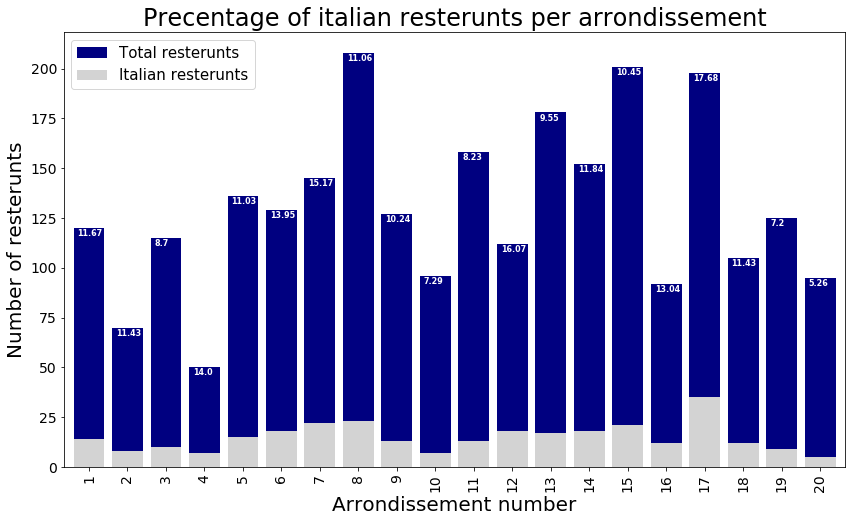

In [283]:
restaurant_count=df_restaurants.groupby(['arrondissement_number']).agg({'is_italian': [lambda x :(x==True).sum(),'count']})
restaurant_count.columns=['Italian resterunts','Total resterunts']
restaurant_count['italian_ratio']=round(100*restaurant_count['Italian resterunts']/restaurant_count['Total resterunts'],2)

restaurant_count['Total resterunts'].plot(kind='bar',figsize=(14,8),fontsize=14,color=['navy'], width=0.8)
restaurant_count['Italian resterunts'].plot(kind='bar',fontsize=14,color=['lightgrey'], width=0.8)

plt.xlabel('Arrondissement number',fontsize=20)
plt.ylabel('Number of resterunts',fontsize=20)
plt.title('Precentage of italian resterunts per arrondissement',fontsize=24)
plt.legend(fontsize=15)
for i in range(len(restaurant_count)): 
    plt.annotate(restaurant_count.iloc[i,2], xy=(i-0.3,restaurant_count.iloc[i,1]-4), color='white',fontsize=8,fontweight="bold")


Let's crete a map **showing heatmap / density** of restaurants and try to extract some meaningfull info from that. Also, let's show borders of Paris arrondissement on our map.

In [284]:
# get latitude and longitude of resterunts
resterunt_latlons=df_restaurants[['venue_lat','venue_lng']]
resterunt_latlons=[[resterunt_latlons.iloc[i,0],resterunt_latlons.iloc[i,1]] for i in range(len(resterunt_latlons))]

# Get the latitude and longitude for italian resterunts only
italian_latlons=df_restaurants_italian[['venue_lat','venue_lng']]
italian_latlons=[[italian_latlons.iloc[i,0],italian_latlons.iloc[i,1]] for i in range(len(italian_latlons))]

In [768]:
from folium import plugins
from folium.plugins import HeatMap


paris_map = folium.Map(location=paris_center, zoom_start=13)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(paris_map)
HeatMap(resterunt_latlons).add_to(paris_map)
folium.Marker(paris_center,popup='Paris center').add_to(paris_map)
paris_map

Restaurant density can be seen to be high in all arrondissements, but a few low density pockets can be found throughout the city.

Let's create another **heatmap map showing heatmap/density of Italian restaurants** only.

In [770]:
from folium import plugins
from folium.plugins import HeatMap


paris_map = folium.Map(location=paris_center, zoom_start=12)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(paris_map)
HeatMap(italian_latlons).add_to(paris_map)
folium.Marker(paris_center).add_to(paris_map)

paris_map

This map is not so 'hot' (Italian restaurants represent a subset of ~11% of all restaurants in Paris) but it also indicates higher density of existing Italian restaurants directly **north and west** from paris_center,**east-wast** and **west-south**.
These heat maps can help us choose the best quarters for opening the resturant after we apply the segmentation of all the quarters.

#### Density of Population per km^2

Tranform the density data into a *pandas* dataframe.

In [287]:
df_density=pd.DataFrame([density]).transpose()
df_density.columns=['Population density']
df_density.index=np.arange(1,21)
df_density.index.name = 'arrondissement_number'
df_density

Population density
arrondissement_number                    
1                                   17400
2                                   23000
3                                   36100
4                                   27900
5                                   60000
6                                   43900
7                                   57800
8                                   40600
9                                   59400
10                                  94000
11                                 154650
12                                 144720
13                                 183260
14                                 140300
15                                 237100
16                                 170000
17                                 170170
18                                 203100
19                                 160100
20                                 198000

#### Median household income

Tranform the Median household income data into a *pandas* dataframe.

In [288]:
df_income=pd.DataFrame([income]).transpose()
df_income.columns=['Income']
df_income.index=np.arange(1,21)
df_income.index.name='arrondissement_number'
df_income

Income
arrondissement_number        
1                       38830
2                       34130
3                       36370
4                       37560
5                       38780
6                       46770
7                       50080
8                       51970
9                       38000
10                      31810
11                      31620
12                      35120
13                      31560
14                      34550
15                      37840
16                      48750
17                      37000
18                      27600
19                      28400
20                      28970

#### The top Paris arrondissements for tourists (ranked from worst to best)

Tranform the top Paris arrondissements data into a *pandas* dataframe.

In [289]:
df_top_paris=pd.DataFrame([top_paris]).transpose()
df_top_paris.columns=['arrondissement_number']
df_top_paris['Grade']=np.linspace(0,100,20)
df_top_paris['Grade']=round(df_top_paris['Grade'],2)
df_top_paris

arrondissement_number   Grade
rank 20                     16    0.00
rank 19                     15    5.26
rank 18                     17   10.53
rank 17                     13   15.79
rank 16                     11   21.05
rank 15                     19   26.32
rank 14                     20   31.58
rank 13                     14   36.84
rank 12                     12   42.11
rank 11                     10   47.37
rank 10                      9   52.63
rank 9                       2   57.89
rank 8                       8   63.16
rank 7                       3   68.42
rank 6                       6   73.68
rank 5                       4   78.95
rank 4                      18   84.21
rank 3                       1   89.47
rank 2                       7   94.74
rank 1                       5  100.00

#### Average rent per square meter (in euros)

Tranform the Average rent per square meter data into a *pandas* dataframe.

In [290]:
df_rent=pd.DataFrame([rent]).transpose()
df_rent.columns=['Rent']
df_rent.index=np.arange(1,21)
df_rent.index.name = 'arrondissement_number'
df_rent

Rent
arrondissement_number      
1                      30.8
2                      30.0
3                      30.0
4                      30.4
5                      29.3
6                      30.4
7                      30.5
8                      28.3
9                      26.7
10                     26.1
11                     26.4
12                     24.9
13                     24.7
14                     25.6
15                     25.9
16                     26.9
17                     26.7
18                     24.9
19                     22.7
20                     23.5

#### Let's summarize the data shown above in bar plot

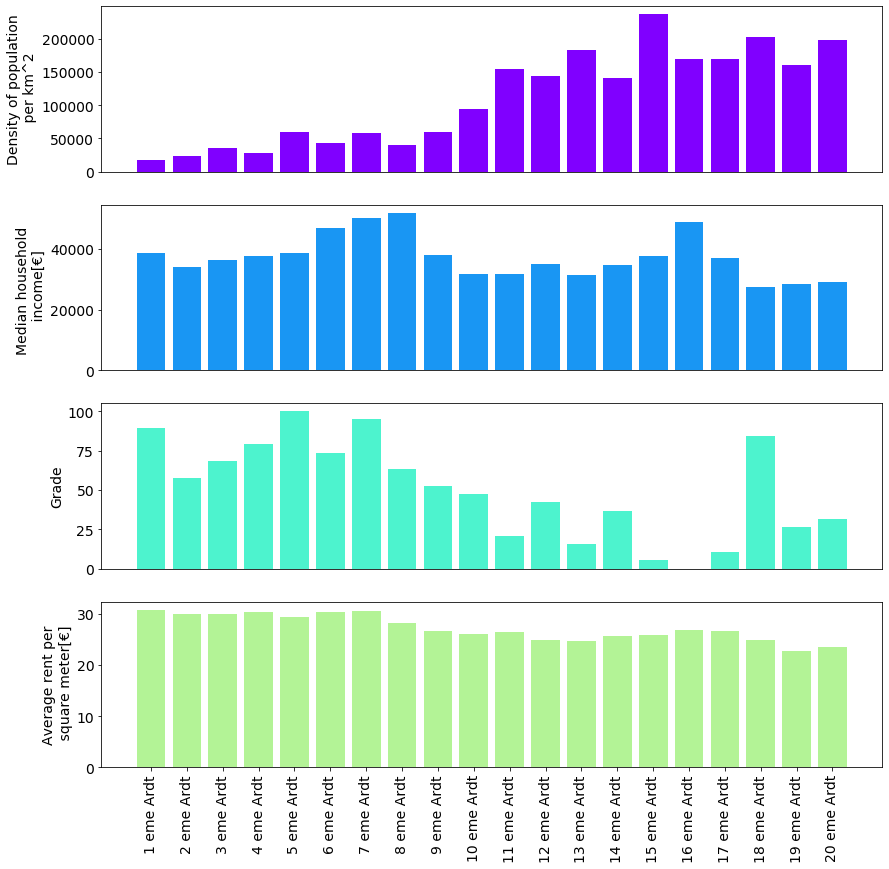

In [291]:
color=cm.rainbow(np.linspace(0,1,6))

fig=plt.figure(figsize=(14,14))
ax1=fig.add_subplot(4,1,1)
ax1.bar(list(density.keys()),density.values(),color=color[0])
ax1.set_ylabel('Density of population\n per km^2',fontsize=14)
ax1.set_xticks([])
ax1.tick_params(labelsize=14)


ax2=fig.add_subplot(4,1,2)
ax2.bar(list(income.keys()),income.values(),color=color[1])
ax2.set_ylabel('Median household \n income[€]',fontsize=14)
ax2.set_xticks([])
ax2.tick_params(labelsize=14)


ax3=fig.add_subplot(4,1,3)
ax3.bar(df_top_paris.arrondissement_number,df_top_paris.Grade,color=color[2])
ax3.set_ylabel('Grade',fontsize=14)
ax3.set_xticks([])
ax3.tick_params(labelsize=14)


ax4=fig.add_subplot(4,1,4)
ax4.bar(list(rent.keys()),rent.values(),color=color[3])
ax4.set_ylabel('Average rent per\n square meter[€]',fontsize=14)

xticks=np.arange(1, 21, step=1)
label=[(str(i)+' eme Ardt') for i in range(1,len(rent)+1)]
ax4.set_xticks(xticks)
ax4.set_xticklabels(label,rotation=90,fontsize=14)
ax4.tick_params(labelsize=14)
plt.show()

We can observe from these graphs a big variance in the first three parameters namely, **Density of population, Median household income and Grade,** between the different arrandosments.
In contrast, the **Average rent per square meter** does not vary significantly between thg different arrondissement.

We can support this claim by calculating the standard deviation (std) for each parameter.

In [292]:
print('Density of population (mean,std): ({:.2f},{:.2f})'.format(df_density['Population density'].mean(),df_density['Population density'].std()))
print('Median household income (mean,std): ({:.2f},{:.2f})'.format(df_income['Income'].mean(),df_income['Income'].std()))
print('Grade (mean,std): ({:.2f},{:.2f})'.format(df_top_paris['Grade'].mean(),df_top_paris['Grade'].std()))
print('\033[0;37;40m Average rent per square meter (mean,std): ({:.2f},{:.2f})'.format(df_rent['Rent'].mean(),df_rent['Rent'].std()))

Density of population (mean,std): (111075.00,71572.46)
Median household income (mean,std): (37285.50,7130.57)
Grade (mean,std): (50.00,31.14)
 Average rent per square meter (mean,std): (27.23,2.55)


In [463]:
quartier_paris=quartier_paris.iloc[:,0:5]
quartier_paris

quartier_number              quartier_name  arrondissement_number  \
0                27            Ecole-Militaire                      7   
1                59                   Grenelle                     15   
2                61                    Auteuil                     16   
3                12               Sainte-Avoie                      3   
4                40        Hôpital-Saint-Louis                     10   
5                77                 Belleville                     20   
6                65                     Ternes                     17   
7                14              Saint-Gervais                      4   
8                25       Saint-Thomas-d'Aquin                      7   
9                38          Porte-Saint-Denis                     10   
10                1  Saint-Germain-l'Auxerrois                      1   
11               73                   Villette                     19   
12               20                   Sorbonne                      5   
13               33              Saint-Georges                      9   
14               34           Chaussée-d'Antin                      9   
15                3               Palais-Royal                      1   
16               21                    Monnaie                      6   
17               22                      Odéon                      6   
18               29             Champs-Elysées                      8   
19               51             Maison-Blanche                     13   
20               52                Croulebarbe                     13   
21               13                Saint-Merri                      4   
22               16                 Notre-Dame                      4   
23               28               Gros-Caillou                      7   
24               26                  Invalides                      7   
25               35        Faubourg-Montmartre                      9   
26                5                    Gaillon                      2   
27               75                   Amérique                     19   
28               41            Folie-Méricourt                     11   
29               49                Salpêtrière                     13   
30                4              Place-Vendôme                      1   
31               76                     Combat                     19   
32               80                   Charonne                     20   
33               60                      Javel                     15   
34               15                    Arsenal                      4   
35               18         Jardin-des-Plantes                      5   
36               39         Porte-Saint-Martin                     10   
37               43                   Roquette                     11   
38               46                     Picpus                     12   
39               56                  Plaisance                     14   
40               19               Val-de-Grâce                      5   
41               58                     Necker                     15   
42               79              Père-Lachaise                     20   
43               72                La Chapelle                     18   
44               23      Notre-Dame-des-Champs                      6   
45               55            Petit-Montrouge                     14   
46               74            Pont-de-Flandre                     19   
47               62                     Muette                     16   
48               64                   Chaillot                     16   
49               68                  Epinettes                     17   
50               32                     Europe                      8   
51               44          Sainte-Marguerite                     11   
52               54         Parc-de-Montsouris                     14   
53               57              Saint-Lambert                

Let's see the ratio between the number of italian restaurants and the total number of restaurants in each quartier.

In [464]:
restaurant_count_quartier=df_restaurants.groupby(['quartier_name']).agg({'is_italian': [lambda x :(x==True).sum(),'count']})
restaurant_count_quartier.columns=['Italian resterunts','Total resterunts']
restaurant_count_quartier['italian_ratio']=round(100*restaurant_count_quartier['Italian resterunts']/restaurant_count_quartier['Total resterunts'],2)
restaurant_count_quartier

Italian resterunts  Total resterunts  italian_ratio
quartier_name                                                                 
Amérique                                    0                 8           0.00
Archives                                    6                63           9.52
Arsenal                                     6                22          27.27
Arts-et-Métiers                             3                39           7.69
Auteuil                                     0                16           0.00
Batignolles                                 8                62          12.90
Bel-Air                                     0                 1           0.00
Belleville                                  1                18           5.56
Bercy                                       6                44          13.64
Bonne-Nouvelle                              0                14           0.00
Chaillot                                   12                67          17.91
Champs-Elysées                              3                26          11.54
Charonne                                    1                27           3.70
Chaussée-d'Antin                            4                18          22.22
Clignancourt                                1                24           4.17
Combat                                      6                68           8.82
Croulebarbe                                 6                53          11.32
Ecole-Militaire                             2                12          16.67
Enfants-Rouges                              1                13           7.69
Epinettes                                   2                17          11.76
Europe                                      6                39          15.38
Faubourg-Montmartre                         0                 8           0.00
Faubourg-du-Roule                           8                78          10.26
Folie-Méricourt                             0                14           0.00
Gaillon                                     1                 2          50.00
Gare                                        6                44          13.64
Goutte-d'Or                                 4                30          13.33
Grandes-Carrières                           7                47          14.89
Grenelle                                    4                61           6.56
Gros-Caillou                               11                55          20.00
Halles                                      9                64          14.06
Hôpital-Saint-Louis                         0                 5           0.00
Invalides                                   8                64          12.50
Jardin-des-Plantes                          4                31          12.90
Javel                                       4                37          10.81
La Chapelle                                 0                 4           0.00
Madeleine                                   6                65           9.23
Mail                                        3                 5          60.00
Maison-Blanche                              2                63           3.17
Monnaie                                     0                 6           0.00
Montparnasse                                5                68           7.35
Muette                                      0                 4           0.00
Necker                                      6                43          13.95
Notre-Dame                                  1                16           6.25
Notre-Dame-des-Champs                       5                38          13.16
Odéon                                       2                11          18.18
Palais-Royal                                0                12           0.00
Parc-de-Montsouris                          6                24          25.00
Petit-Montrouge                             3                24          12.5

#### Let's join the data shown above to one dataframe

In [465]:
quartier_paris=quartier_paris.join(df_density,on='arrondissement_number')
quartier_paris=quartier_paris.join(df_income,on='arrondissement_number')
quartier_paris=quartier_paris.join(df_rent,on='arrondissement_number')
quartier_paris=quartier_paris.join(df_top_paris.set_index('arrondissement_number'),on='arrondissement_number')
quartier_paris=quartier_paris.join(restaurant_count_quartier[['Italian resterunts','Total resterunts']],on='quartier_name')
quartier_paris

quartier_number              quartier_name  arrondissement_number  \
0                27            Ecole-Militaire                      7   
1                59                   Grenelle                     15   
2                61                    Auteuil                     16   
3                12               Sainte-Avoie                      3   
4                40        Hôpital-Saint-Louis                     10   
5                77                 Belleville                     20   
6                65                     Ternes                     17   
7                14              Saint-Gervais                      4   
8                25       Saint-Thomas-d'Aquin                      7   
9                38          Porte-Saint-Denis                     10   
10                1  Saint-Germain-l'Auxerrois                      1   
11               73                   Villette                     19   
12               20                   Sorbonne                      5   
13               33              Saint-Georges                      9   
14               34           Chaussée-d'Antin                      9   
15                3               Palais-Royal                      1   
16               21                    Monnaie                      6   
17               22                      Odéon                      6   
18               29             Champs-Elysées                      8   
19               51             Maison-Blanche                     13   
20               52                Croulebarbe                     13   
21               13                Saint-Merri                      4   
22               16                 Notre-Dame                      4   
23               28               Gros-Caillou                      7   
24               26                  Invalides                      7   
25               35        Faubourg-Montmartre                      9   
26                5                    Gaillon                      2   
27               75                   Amérique                     19   
28               41            Folie-Méricourt                     11   
29               49                Salpêtrière                     13   
30                4              Place-Vendôme                      1   
31               76                     Combat                     19   
32               80                   Charonne                     20   
33               60                      Javel                     15   
34               15                    Arsenal                      4   
35               18         Jardin-des-Plantes                      5   
36               39         Porte-Saint-Martin                     10   
37               43                   Roquette                     11   
38               46                     Picpus                     12   
39               56                  Plaisance                     14   
40               19               Val-de-Grâce                      5   
41               58                     Necker                     15   
42               79              Père-Lachaise                     20   
43               72                La Chapelle                     18   
44               23      Notre-Dame-des-Champs                      6   
45               55            Petit-Montrouge                     14   
46               74            Pont-de-Flandre                     19   
47               62                     Muette                     16   
48               64                   Chaillot                     16   
49               68                  Epinettes                     17   
50               32                     Europe                      8   
51               44          Sainte-Marguerite                     11   
52               54         Parc-de-Montsouris                     14   
53               57              Saint-Lambert                

We want to find the distance between each quarter to center of Paris.
Let's create functions to convert between WGS84 spherical coordinate system (latitude/longitude degrees) and UTM Cartesian coordinate system (X/Y coordinates in meters). This allows us to calculate distances in meters (not in latitude/longitude degrees).

In [466]:
#!pip install shapely
#!pip install pyproj

In [467]:
import pyproj
import math

In [468]:

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=31, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=31, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

In [469]:
paris_center_xy=lonlat_to_xy(paris_center[1],paris_center[0])
for index, row in quartier_paris.iterrows():
    quartier_xy=lonlat_to_xy(row.Longitude,row.Latitude)
    dis=calc_xy_distance(paris_center_xy[0],paris_center_xy[1],quartier_xy[0],quartier_xy[1])
    quartier_paris.loc[index,'dis']=round(dis,2)
quartier_paris

quartier_number              quartier_name  arrondissement_number  \
0                27            Ecole-Militaire                      7   
1                59                   Grenelle                     15   
2                61                    Auteuil                     16   
3                12               Sainte-Avoie                      3   
4                40        Hôpital-Saint-Louis                     10   
5                77                 Belleville                     20   
6                65                     Ternes                     17   
7                14              Saint-Gervais                      4   
8                25       Saint-Thomas-d'Aquin                      7   
9                38          Porte-Saint-Denis                     10   
10                1  Saint-Germain-l'Auxerrois                      1   
11               73                   Villette                     19   
12               20                   Sorbonne                      5   
13               33              Saint-Georges                      9   
14               34           Chaussée-d'Antin                      9   
15                3               Palais-Royal                      1   
16               21                    Monnaie                      6   
17               22                      Odéon                      6   
18               29             Champs-Elysées                      8   
19               51             Maison-Blanche                     13   
20               52                Croulebarbe                     13   
21               13                Saint-Merri                      4   
22               16                 Notre-Dame                      4   
23               28               Gros-Caillou                      7   
24               26                  Invalides                      7   
25               35        Faubourg-Montmartre                      9   
26                5                    Gaillon                      2   
27               75                   Amérique                     19   
28               41            Folie-Méricourt                     11   
29               49                Salpêtrière                     13   
30                4              Place-Vendôme                      1   
31               76                     Combat                     19   
32               80                   Charonne                     20   
33               60                      Javel                     15   
34               15                    Arsenal                      4   
35               18         Jardin-des-Plantes                      5   
36               39         Porte-Saint-Martin                     10   
37               43                   Roquette                     11   
38               46                     Picpus                     12   
39               56                  Plaisance                     14   
40               19               Val-de-Grâce                      5   
41               58                     Necker                     15   
42               79              Père-Lachaise                     20   
43               72                La Chapelle                     18   
44               23      Notre-Dame-des-Champs                      6   
45               55            Petit-Montrouge                     14   
46               74            Pont-de-Flandre                     19   
47               62                     Muette                     16   
48               64                   Chaillot                     16   
49               68                  Epinettes                     17   
50               32                     Europe                      8   
51               44          Sainte-Marguerite                     11   
52               54         Parc-de-Montsouris                     14   
53               57              Saint-Lambert                

### Cluster Neighborhoods and Exmine clusters 

Let us now cluster the quarters of paris to identifying similar arrondissement and their properties based on the dataset.

#### Normalizing over the standard deviation
Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally.

In [540]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# extract the necessary data for clustering
X=quartier_paris.loc[:,'Population density':'dis'].values
X = np.nan_to_num(X)

# normalize the data
#X = MinMaxScaler().fit(X).transform(X)
X = StandardScaler().fit_transform(X)

Let's determine the optimal value of K for our dataset using the Elbow and average silhouette methods.

**Average silhouette method:**

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.
For each observation i, the silhouette width si is calculated as follows:
Si=(bi−ai)/max(ai,bi), where:
ai = The mean distance between a sample and all other points in the same class.
bi = The mean distance between a sample and all other points in the next nearest cluster.
Finally the we calculate the mean Silhouette Coefficient over all samples.

**Elbow method:**

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k and for each value of k calculate the sum of squared errors (SSE). SSE is defined as the sum of the squared distance between centroid and each member of the cluster.

In [732]:
from sklearn.metrics import silhouette_score
sil_coeff_arr=[]
distortions_arr=[]
k=range(2, 30)
for n in k:
    k_means = KMeans(init="k-means++", n_clusters=n, n_init=12)
    k_means.fit(X)
    label = k_means.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    sil_coeff_arr.append(sil_coeff)
    distortions=k_means.inertia_
    distortions_arr.append(distortions)
    print("For n_clusters={}, The Silhouette Coefficient is {}, distortions is {} ".format(n, sil_coeff,distortions))

For n_clusters=2, The Silhouette Coefficient is 0.3698230657015603, distortions is 329.3441550491789 
For n_clusters=3, The Silhouette Coefficient is 0.30228798009979696, distortions is 267.7070057922054 
For n_clusters=4, The Silhouette Coefficient is 0.2939443538997889, distortions is 213.17127281970994 
For n_clusters=5, The Silhouette Coefficient is 0.30913211637531146, distortions is 175.7276760894295 
For n_clusters=6, The Silhouette Coefficient is 0.3118263663921226, distortions is 155.4008739658681 
For n_clusters=7, The Silhouette Coefficient is 0.27381164321862517, distortions is 139.977444499886 
For n_clusters=8, The Silhouette Coefficient is 0.27318200479688587, distortions is 128.16746049905532 
For n_clusters=9, The Silhouette Coefficient is 0.3051262788168322, distortions is 115.37241760865074 
For n_clusters=10, The Silhouette Coefficient is 0.28972689832435655, distortions is 104.9495714758019 
For n_clusters=11, The Silhouette Coefficient is 0.32376667794516356, dist

The following graph represents the average Silhouette Coefficient and sum of squared distance as a function of the number of clusters.

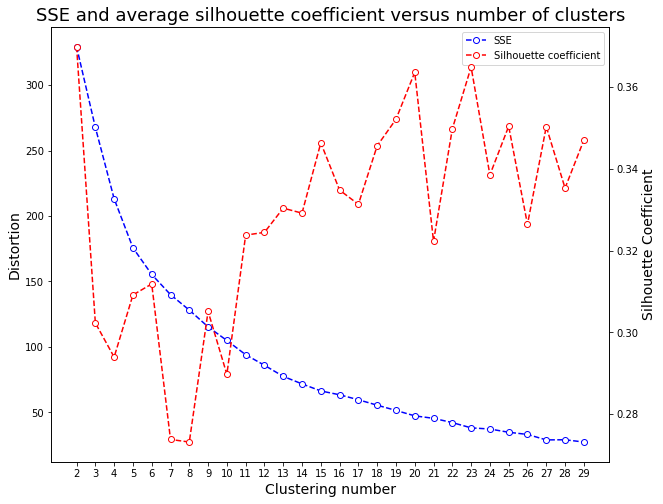

In [733]:
fig=plt.figure(figsize=(10,8))
ax0=fig.add_subplot(1,1,1)
ax0.plot(k, distortions_arr, linestyle='--', color='b',marker='o',markerfacecolor='w',label='SSE')
ax0.set_xlabel('Clustering number',fontsize=14)
ax0.set_ylabel('Distortion',fontsize=14)

ax1 = ax0.twinx() 
ax1.plot(k, sil_coeff_arr,linestyle='--',color='r',marker='o',markerfacecolor='w',label='Silhouette coefficient')
ax1.set_xlabel('k')
ax1.set_ylabel('Silhouette Coefficient',fontsize=14)
ax1.set_title('SSE and average silhouette coefficient versus number of clusters',fontsize=18)
ax1.set_xticks(k)

ax0.plot(np.nan, linestyle='--',color='r',marker='o',markerfacecolor='w',label='Silhouette coefficient')  # Make an agent in ax
ax0.legend(loc=0)
plt.show()


Generally, a higher average silhouette coefficient indicates better clustering quality. In this view,
the optimal clustering number of arrondissement in the study area should be 2, at which the value of the
average silhouette coefficient is highest. However, the SSE of this clustering solution (k = 2) is too
large. At k = 5, the SSE is much lower. In addition, the value of the average silhouette coefficient at
k = 5 is also very high, which is just lower than k = 2. Thus, we use the clustering result at k = 5.

Run k-means to cluster the neighborhood into 5 clusters and assign the labels to each row in dataframe.

In [734]:
# set number of clusters
kclusters = 5

# run k-means clustering
k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=12)
k_means.fit(X)

# assign the labels
label = k_means.labels_
quartier_paris['Label']=label

We can easily check the centroid values by averaging the features in each cluster.

In [736]:
quartier_paris.groupby('Label').mean().loc[:,'Population density':'dis']

Population density        Income       Rent      Grade  \
Label                                                           
0           164008.000000  30268.000000  24.715000  42.632000   
1            44891.666667  46130.000000  29.316667  75.000000   
2           176212.777778  35223.888889  25.650000  18.713889   
3            38570.833333  39016.666667  29.741667  75.656667   
4           161601.666667  42248.333333  26.200000  15.791667   

       Italian resterunts  Total resterunts          dis  
Label                                                     
0                2.100000         22.000000  3417.413500  
1                7.000000         59.666667  2382.900000  
2                6.833333         57.166667  3661.003889  
3                2.090909         17.454545  1462.975833  
4                0.400000          8.600000  6276.915000

Now we can create a profile for each group, considering the common characteristics of each cluster.
It can be observed from the data that clusters 1 and 3 meets most of the criteria. We can label these clusters as follows:
* Cluster 1: The neighborhoods in this cluster are characterized by **close proximity to the city center**, high **grade**, and high **average household income**. However, these neighborhoods also have a low **population density** and relatively high **number of Italian resturants**. 


* Cluster 3: The neighborhoods in this cluster are characterized by a very **close proximity to the city center**, high **grade**, a relatively low **number of Italian resturants**, and high **average household income**. However, these neighborhoods also have a very low **population density**. 

Let us now join the labels to quartier_paris data frame

In [763]:
quartier_paris

quartier_number              quartier_name  arrondissement_number  \
0                27            Ecole-Militaire                      7   
1                59                   Grenelle                     15   
2                61                    Auteuil                     16   
3                12               Sainte-Avoie                      3   
4                40        Hôpital-Saint-Louis                     10   
5                77                 Belleville                     20   
6                65                     Ternes                     17   
7                14              Saint-Gervais                      4   
8                25       Saint-Thomas-d'Aquin                      7   
9                38          Porte-Saint-Denis                     10   
10                1  Saint-Germain-l'Auxerrois                      1   
11               73                   Villette                     19   
12               20                   Sorbonne                      5   
13               33              Saint-Georges                      9   
14               34           Chaussée-d'Antin                      9   
15                3               Palais-Royal                      1   
16               21                    Monnaie                      6   
17               22                      Odéon                      6   
18               29             Champs-Elysées                      8   
19               51             Maison-Blanche                     13   
20               52                Croulebarbe                     13   
21               13                Saint-Merri                      4   
22               16                 Notre-Dame                      4   
23               28               Gros-Caillou                      7   
24               26                  Invalides                      7   
25               35        Faubourg-Montmartre                      9   
26                5                    Gaillon                      2   
27               75                   Amérique                     19   
28               41            Folie-Méricourt                     11   
29               49                Salpêtrière                     13   
30                4              Place-Vendôme                      1   
31               76                     Combat                     19   
32               80                   Charonne                     20   
33               60                      Javel                     15   
34               15                    Arsenal                      4   
35               18         Jardin-des-Plantes                      5   
36               39         Porte-Saint-Martin                     10   
37               43                   Roquette                     11   
38               46                     Picpus                     12   
39               56                  Plaisance                     14   
40               19               Val-de-Grâce                      5   
41               58                     Necker                     15   
42               79              Père-Lachaise                     20   
43               72                La Chapelle                     18   
44               23      Notre-Dame-des-Champs                      6   
45               55            Petit-Montrouge                     14   
46               74            Pont-de-Flandre                     19   
47               62                     Muette                     16   
48               64                   Chaillot                     16   
49               68                  Epinettes                     17   
50               32                     Europe                      8   
51               44          Sainte-Marguerite                     11   
52               54         Parc-de-Montsouris                     14   
53               57              Saint-Lambert                

Finally, let's visualize the resulting clusters on the heatmap/density of Italian restaurants.

In [764]:
map_cluster=folium.Map(location=paris_center,zoom_start=12)
num_of_cluster=len(quartier_paris.loc[:,'Label'].unique())

rainbow=cm.rainbow(np.linspace(0,1,num_of_cluster))
for index,row in quartier_paris.iterrows():
    col=colors.rgb2hex(rainbow[row.Label])
    lat=row.Latitude
    lng=row.Longitude
    label='{}, arrondissement: {}, Cluster {}.'.format(row.quartier_name,row.arrondissement_number,row.Label)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker([lat,lng],radius=5,fill=True,color=col,fill_opacity=1, popup=label).add_to(map_cluster)
    #folium.Circle([lat,lng],radius=350,fill=False,color='white').add_to(map_cluster)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(map_cluster)
HeatMap(italian_latlons).add_to(map_cluster)
map_cluster

Let's see some candidate neighborhoods which can be presented to the stakeholders. These neighborhoods belongs to Cluster 1 and Cluster 3. They are located in areas with low density of Italian restaurants are also located near to the city center.

In [767]:
# Create the candidate neighborhoods list
candidate=['Ecole-Militaire','Notre-Dame-des-Champs','Odéon','Monnaie','Notre-Dame','Saint-Merri','Halles']

# Extract the candidate from quartier_paris dataframe
df_candidate=quartier_paris.loc[quartier_paris.loc[:,'quartier_name'].isin (candidate)]
df_candidate=df_candidate.loc[:,'quartier_number':'Longitude'].reset_index(drop=True)

# Calculate UTM Cartesian coordinate for candidate
candidate_xy=lonlat_to_xy(df_candidate.loc[:,'Longitude'].to_list(),df_candidate.loc[:,'Latitude'].to_list())
df_candidate['X']=candidate_xy[0]
df_candidate['Y']=candidate_xy[1]
df_candidate['Label']=quartier_paris.loc[quartier_paris.loc[:,'quartier_name'].isin (candidate),'Label'].to_list()
df_candidate

quartier_number          quartier_name  arrondissement_number   Latitude  \
0               27        Ecole-Militaire                      7  48.850359   
1               21                Monnaie                      6  48.854384   
2               22                  Odéon                      6  48.847801   
3               13            Saint-Merri                      4  48.858521   
4               16             Notre-Dame                      4  48.852896   
5               23  Notre-Dame-des-Champs                      6  48.846428   
6                2                 Halles                      1  48.862289   

   Longitude              X             Y  Label  
0   2.311031  449456.433642  5.411050e+06      3  
1   2.340035  451588.100838  5.411479e+06      3  
2   2.336339  451310.557771  5.410749e+06      3  
3   2.351667  452445.253980  5.411931e+06      3  
4   2.352775  452521.207748  5.411305e+06      3  
5   2.327357  450650.252620  5.410602e+06      1  
6   2.344899  451952.427690  5.412354e+06      1

In [766]:
# Extract UTM Cartesian coordinate
Coord=df_candidate.loc[:,'X':'Y'].values

# Create clusters for candidate neighborhoods
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(Coord)
cluster_centers = [xy_to_lonlat(cc[0], cc[1]) for cc in k_means.cluster_centers_]


map_cluster=folium.Map(location=paris_center,zoom_start=12)
num_of_cluster=len(quartier_paris.loc[:,'Label'].unique())
rainbow=cm.rainbow(np.linspace(0,1,num_of_cluster))
for index,row in quartier_paris.iterrows():
    col=colors.rgb2hex(rainbow[row.Label])
    lat=row.Latitude
    lng=row.Longitude
    label='{}, arrondissement: {}, Cluster {}.'.format(row.quartier_name,row.arrondissement_number,row.Label)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker([lat,lng],radius=5,fill=True,color=col,fill_opacity=1, popup=label).add_to(map_cluster)
    #folium.Circle([lat,lng],radius=350,fill=False,color='white').add_to(map_cluster)
for lng, lat in cluster_centers:
    folium.features.Circle([lat,lng], radius=650, color='green', fill=True, fill_opacity=0.25).add_to(map_cluster)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(map_cluster)
HeatMap(italian_latlons).add_to(map_cluster)
map_cluster

This concludes our analysis. We have created 3 representative zones containing neighborhoods with low number of Italian restaurants, which are fairly close to the city center and belong to clusters 1 and 3. These zones encompass an area included by a radius of ~650 meters (green circles) and their centers should be considered only as a starting point for exploring potential neighborhoods.

## Results and Discussion <a name="results"> </a>

Our analysis was comprised of a segmentation of the 80 neighborhoods in Paris. The segmentation was performed based on different parameters which are of importance when deciding upon the best location to open an Italian restaurant. The criteria that are of interest to the stakeholders, and thus are important when perfuming the segmentation, are as follows:

* An area with low density of restaurants in general, and of Italian restaurants in particular, in order to reduce the competition with active restaurants.

* An area with high population density, so the restaurant will be widely accessible.

* An area with higher-income neighborhoods, where income level might allow for a greater amount of spending than in lower-income neighborhoods.

* An area with Low rental prices on average, in order to reduce the routine monthly expanses.

* A popular tourist area, in order to increase sales.

 

All the data was collected and then analyzed in order to perform a segmentation of all the 80 neighborhoods of Paris, using the K-means machine learning algorithm. By using the elbow and average silhouette methods we have found that the optimal value of K (number of clusters) is 5. Following the distribution of the neighborhoods to the different clusters, we created a profile for each cluster and chose the most suitable one.

 

The promising clusters, which met most of the criteria, were clusters 1 and 3. These clusters were labeled as follows:

* Cluster 1: The neighborhoods in this cluster are characterized by close proximity to the city center, high grade, and high average household income. However, these neighborhoods also have a low population density and relatively high number of Italian restaurants.

 

* Cluster 3: The neighborhoods in this cluster are characterized by a very close proximity to the city center, high grade, a relatively low number of Italian restaurants, and high average household income. However, these neighborhoods also have a very low population density.

In both clusters the average rent is similar, and thus it had no effect the on the decision about the best cluster.


Using the Clustered and Heat maps, we concluded that the following neighborhoods in the city of Paris represents a good starting point for opening an Italian resturant, and can be of interest to the stakeholders: **Notre-Dame-des-Champs, Halles** (part of cluster 1) and **Ecole-Militaire, Monnaie, Odéon, Saint-Merri, Notre-Dame** (part of cluster 3). These neighborhoods are located in areas with the lowest density of Italian restaurants and are fairly close to the city center. This of course does not imply that these neighborhoods are actually the optimal locations to open a new restaurant. The purpose of the analysis performed here was to narrow the search down to just a few possible locations that are best suit to match the criteria that was decided upon by the stakeholders. Recommended zones should therefore be considered only as a starting point for more detailed analysis, which should take into consideration more relevant factors. 

## Conclusions <a name="conclusion"> </a>

The purpose of this project was to identify the most suitable areas in Paris to open an Italian restaurant, based on pre-selected criteria, in order to aid stakeholders in narrowing down the search for optimal location for a new restaurant. Clustering of the different neighborhoods was performed by calculating the Italian restaurant density, and by collecting relevant data such as the average income, population density and average rent rates. Analysis of the results showed two promising clusterswhich met most of the criteria.  


Final decision on an optimal restaurant location will be made by stakeholders based on the weight they chose to give to each specific criterion  of the neighborhoods, while taking into consideration additional factors like attractiveness of each location (proximity to popular landmarks), levels of noise / proximity to major roads, public transportation availability etc.